In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')

In [6]:
data.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description', 'Address',
       'Cross Street', 'Location', 'Zip Codes', 'Census Tracts',
       'Precinct Boundaries', 'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)'], dtype=object)

In [7]:
#CLEANING DATA. Filling in Victim's age with average age.
import copy
df_age = copy.deepcopy(data)
mean_age = df_age['Victim Age'].mean()
df_age['Victim Age'].dropna()
df_age['Date Occurred'].replace(regex=True,inplace=True,to_replace=r'T00:00:00.000',value=r'')
#replace H,N with X because all are unknown
df_age['Victim Sex'] = df_age['Victim Sex'].replace(['H', 'N',''], 'X')
#get hour of time instead of by minute
df_age['Time (hour)'] = df_age['Time Occurred'].floordiv(100)

In [8]:
#Determining Time occurred and victim age relationship
#What age are those in most traffic accidents?
df_age['Victim Age'].value_counts()
#data[['Date Occurred', 'Time Occurred', 'Victim Age']][:20]

30.0    14048
25.0    13111
24.0    11577
27.0    11494
28.0    11419
26.0    11334
40.0    11292
35.0    11255
23.0    11194
50.0    10767
29.0    10726
22.0    10693
31.0    10099
32.0     9788
21.0     9439
33.0     9267
45.0     9069
34.0     8966
20.0     8723
36.0     8502
37.0     8250
38.0     8142
39.0     7829
41.0     7741
42.0     7647
43.0     7420
44.0     7297
46.0     7261
49.0     7224
47.0     7166
        ...  
78.0      737
80.0      626
79.0      622
81.0      580
83.0      466
82.0      454
84.0      377
85.0      333
86.0      261
87.0      233
19.0      222
89.0      190
88.0      176
90.0      158
17.0      124
91.0       93
92.0       81
94.0       51
95.0       50
93.0       47
96.0       40
16.0       37
98.0       34
97.0       32
15.0       27
14.0       13
13.0        9
12.0        8
10.0        4
11.0        3
Name: Victim Age, Length: 90, dtype: int64

In [9]:
#determining what age has most accidents after 8PM
df_age[df_age['Time Occurred'] > 2200]['Victim Age'].value_counts()[:20]
#seeing the victim ages of based on accident time sorted by accident time
#data[data['Time Occurred'] > 2000][['Time Occurred', 'Victim Age']].sort_values(['Time Occurred', 'Victim Age'])

30.0    1052
25.0     959
22.0     831
27.0     828
23.0     818
24.0     813
26.0     799
28.0     766
40.0     760
50.0     715
21.0     711
29.0     710
20.0     701
Name: Victim Age, dtype: int64

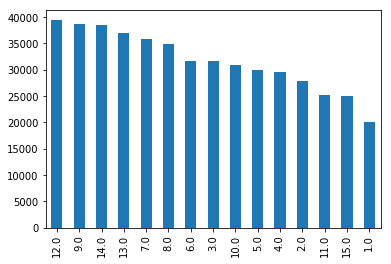

In [10]:
#15 city council districts. Council districts refer to a small local areas in the city.
district_data = data['Council Districts'].value_counts().plot(kind = 'bar')
#we see that district 12 is the council district with the most traffic collisions

In [11]:
#Shows that Date Occurred and Date Reported are the same for all so no discrepency there
mask = data['Date Reported'] == data['Date Occurred']
mask.value_counts()

True     343000
False    138568
dtype: int64

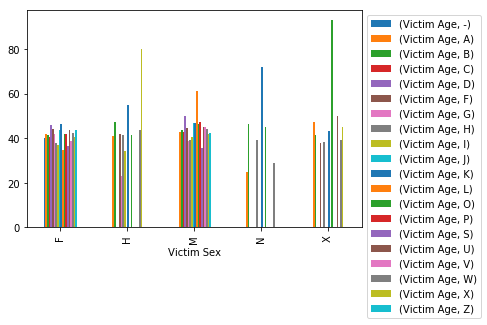

In [12]:
#seeing average age in collisions grouped by sex and descent.
import seaborn as sns
data.groupby(['Victim Sex', 'Victim Descent'])[['Victim Age']].mean().unstack().plot.bar().legend(bbox_to_anchor=(1,1))
#sns.barplot(mask, palette='Blues_d')

In [13]:
dates = pd.date_range(start='7/20/2018', end='7/20/2019', freq='B')
data.index = pd.to_datetime(data['Date Occurred'])
data.loc[dates]

test = data['Time Occurred'].rolling(window=365, min_periods=1).mean()
test[:5]

Date Occurred
2019-07-20    1040.000000
2019-07-20     945.000000
2019-07-20     933.333333
2019-07-20     875.000000
2019-07-20     940.000000
Name: Time Occurred, dtype: float64

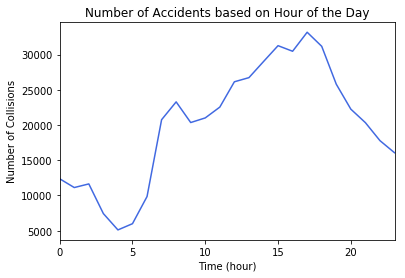

Time (hour)
0     12370
1     11128
2     11643
3      7433
4      5118
5      6001
6      9853
7     20750
8     23280
9     20349
10    21006
11    22541
12    26130
13    26718
14    28997
15    31252
16    30460
17    33157
18    31160
19    25788
20    22247
21    20334
22    17784
23    16069
Name: Date Occurred, dtype: int64

In [14]:
#number of accidents at this time (time on x, # of accidents on y)
data['Time (hour)'] = data['Time Occurred'].floordiv(100)
temp = data.groupby('Time (hour)')['Date Occurred'].count()
temp.plot(color = 'royalblue', title = 'Number of Accidents based on Hour of the Day')
ylabel('Number of Collisions')
show()
temp

Text(0,0.5,'Number of Collisions')

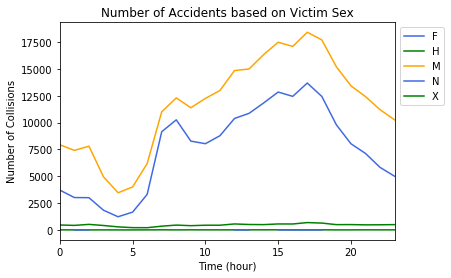

In [15]:
#number of accidents at this time based on Sex (time on x, # of accidents on y)
data['Time (hour)'] = data['Time Occurred'].floordiv(100)
temp = data.groupby(['Time (hour)', 'Victim Sex'])['Date Occurred'].count()
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
colours = ['royalblue', 'green', 'orange'][0:len(data['Victim Sex'])]
temp.unstack().plot(color = colours, title = 'Number of Accidents based on Victim Sex').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')
#show()

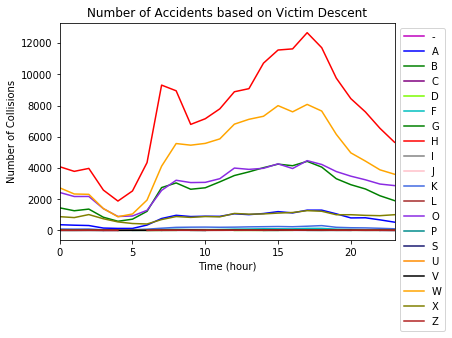

In [16]:
#number of accidents at this time based on Sex (time on x, # of accidents on y)
import seaborn as sns
temp = data.groupby(['Time (hour)', 'Victim Descent'])['Date Occurred'].count()
colours = ['m', 'blue','g','purple','lawngreen','c', 'green','red', '125','pink', 'royalblue', 'brown', 'blueviolet', 'darkcyan', 'midnightblue', 'darkorange', 'black', 'orange', 'olive', 'firebrick' ][0:len(data['Victim Descent'])]
#temp2 = data.groupby('Time (hour)')['Date Occurred'].count()
temp.unstack().plot(color = colours, title = 'Number of Accidents based on Victim Descent').legend(bbox_to_anchor=(1,1))
ylabel('Number of Collisions')
show()

In [17]:
#see if more accidents happen at certain time in certain areas (zip codes or area names)
#Where the most accidents happen at this time
temp = data.groupby(['Time (hour)', 'Area Name'])['Date Occurred'].count()
df = temp.unstack()
df2 = pd.DataFrame()
df2['Number of Collisions'] = df.max(axis=1)
df2['Area Name'] = df.idxmax(axis = 1)
df2

,Number of Collisions,Area Name
Time (hour),,
0,869,Hollywood
1,885,Hollywood
2,1143,Hollywood
3,559,77th Street
4,392,77th Street
5,481,77th Street
6,677,77th Street
7,1421,Southwest
8,1491,Southwest


In [18]:
new = data['Location'].str.split(",", expand=True)
new2 = new[0].str.split(":", expand=True)
data['Latitude'] = new2[1].str.replace("'","").astype(float)
data['Longitude'] = new[5].str.split(":", expand=True)[1].str.replace("'","").str.replace("}","").astype(float)

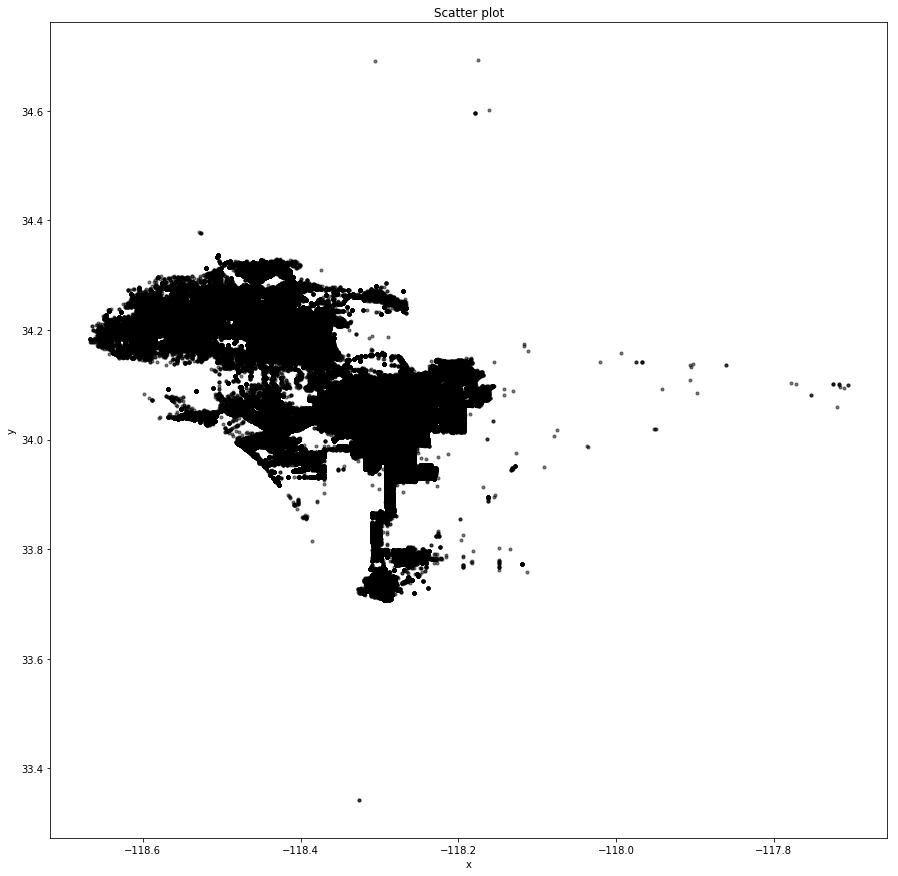

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
traffic_data= data[data['Latitude'] != 0.0]
x=traffic_data['Longitude']
y=traffic_data['Latitude']
colors = ('black')
area = np.pi*3

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 432x288 with 0 Axes>

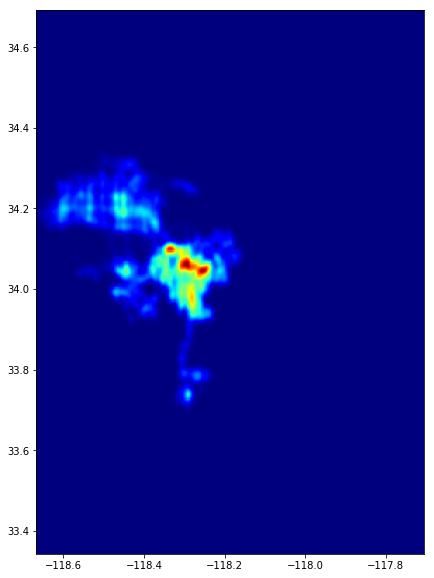

In [20]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)
heatmap = gaussian_filter(heatmap, sigma=3)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=cm.jet)
plt.show()

In [21]:
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

traffic_data = data[data['Latitude'] != 0.0000]
la_map = gpd.read_file("CA_Counties_TIGER2016.shp")
fig, ax = plt.subplots(figsize = (15,15))
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(traffic_data['Longitude'], traffic_data['Latitude'])]
geo_data = gpd.GeoDataFrame(traffic_data, crs = crs, geometry = geometry)

geo_data[geo_data['Time (hour)'] == 0].plot(ax = ax, markersize = 2, color = 'red', marker = 'o', label = '12AM')
geo_data[geo_data['Time (hour)'] == 9].plot(ax = ax, markersize = 2, color = 'blue', marker = 'o', label = '9AM')
geo_data[geo_data['Time (hour)'] == 16].plot(ax = ax, markersize = 2, color = 'green', marker = 'o', label = '4PM')
plt.legend(prop={'size': 15})

ImportError: No module named descartes

## Determine when each age group is involved in proportionally more accidents than they are overall. 

In [22]:
df_age['Age Bins']= pd.cut(df_age['Victim Age'],[0,20,30,40,50,60,70,80,90,100])

In [23]:
df_age['Unique'] = df_age['DR Number'].astype(str)+' '+df_age['Date Occurred']

In [24]:
age_time = df_age.groupby(['Time (hour)','Age Bins'], as_index=False)[['Unique']].agg(['count'])
age_time

Unique
                       count
Time (hour) Age Bins        
0           (0, 20]      317
            (20, 30]    3281
            (30, 40]    2194
            (40, 50]    1700
            (50, 60]    1065
            (60, 70]     411
            (70, 80]     106
            (80, 90]      25
            (90, 100]    297
1           (0, 20]      279
            (20, 30]    2976
            (30, 40]    1899
            (40, 50]    1460
            (50, 60]     789
            (60, 70]     317
            (70, 80]      73
            (80, 90]      14
            (90, 100]    254
2           (0, 20]      267
            (20, 30]    3086
            (30, 40]    1992
            (40, 50]    1418
            (50, 60]     803
            (60, 70]     307
            (70, 80]      75
            (80, 90]      15
            (90, 100]    229
3           (0, 20]      143
            (20, 30]    1771
            (30, 40]    1117
...                      ...
20          (70, 80]     349
            (80, 90]      94
            (90, 100]    276
21          (0, 20]      541
            (20, 30]    5459
            (30, 40]    3954
            (40, 50]    3138
            (50, 60]    2203
            (60, 70]    1001
            (70, 80]     233
            (80, 90]      74
            (90, 100]    255
22          (0, 20]      503
            (20, 30]    5026
            (30, 40]    3372
            (40, 50]    2603
            (50, 60]    1703
            (60, 70]     750
            (70, 80]     189
            (80, 90]      39
            (90, 100]    282
23          (0, 20]      432
            (20, 30]    4442
            (30, 40]    3050
            (40, 50]    2342
            (50, 60]    1394
            (60, 70]     576
            (70, 80]     143
            (80, 90]      34
            (90, 100]    252

[216 rows x 1 columns]

In [170]:
age_time1 = age_time.unstack(['Time (hour)'])

In [171]:
age_time_t = age_time1.T
age_time_t

Age Bins                  (0, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  \
             Time (hour)                                                    
Unique count 0                317      3281      2194      1700      1065   
             1                279      2976      1899      1460       789   
             2                267      3086      1992      1418       803   
             3                143      1771      1117       890       530   
             4                112      1125       728       685       428   
             5                 98      1160      1078       981       725   
             6                157      1970      1977      1878      1384   
             7                312      4427      4566      3825      2690   
             8                368      5405      5067      4229      3061   
             9                315      4540      4101      3517      2847   
             10               366      4378      4075      3644      2991   

In [172]:
collisions_by_age = age_time_t.apply(sum)
collisions_by_age

Age Bins
(0, 20]       10209
(20, 30]     115035
(30, 40]      93390
(40, 50]      78625
(50, 60]      58275
(60, 70]      28814
(70, 80]      10068
(80, 90]       3228
(90, 100]      6378
dtype: int64

In [173]:
collisions_by_time = age_time1.apply(sum)
collisions_by_time

               Time (hour)
Unique  count  0               9396
               1               8061
               2               8192
               3               4858
               4               3417
               5               4625
               6               8407
               7              17738
               8              20431
               9              17867
               10             18329
               11             19566
               12             22698
               13             23107
               14             25058
               15             26633
               16             26091
               17             28469
               18             26551
               19             21898
               20             18640
               21             16858
               22             14467
               23             12665
dtype: int64

In [174]:
collisions_proportion_by_age = collisions_by_age/collisions_by_age.sum()
collisions_proportion_by_age

Age Bins
(0, 20]      0.025268
(20, 30]     0.284725
(30, 40]     0.231151
(40, 50]     0.194606
(50, 60]     0.144237
(60, 70]     0.071318
(70, 80]     0.024919
(80, 90]     0.007990
(90, 100]    0.015786
dtype: float64

In [175]:
age_time1

Unique                                                        \
             count                                                         
Time (hour)     0     1     2     3     4     5     6     7     8     9    
Age Bins                                                                   
(0, 20]        317   279   267   143   112    98   157   312   368   315   
(20, 30]      3281  2976  3086  1771  1125  1160  1970  4427  5405  4540   
(30, 40]      2194  1899  1992  1117   728  1078  1977  4566  5067  4101   
(40, 50]      1700  1460  1418   890   685   981  1878  3825  4229  3517   
(50, 60]      1065   789   803   530   428   725  1384  2690  3061  2847   
(60, 70]       411   317   307   190   199   344   645  1169  1369  1454   
(70, 80]       106    73    75    48    45    94   187   386   484   596   
(80, 90]        25    14    15    20     8    31    42   107   158   200   
(90, 100]      297   254   229   149    87   114   167   256   290   297   

                                                                               \
                                                                                
Time (hour)    10    11    12    13    14    15    16    17    18    19    20   
Age Bins                                                                        
(0, 20]       366   410   508   547   592   690   749   664   701   600   538   
(20, 30]     4378  4735  5904  5942  6504  7021  7070  8149  7947  6875  5842   
(30, 40]     4075  4256  5006  5042  5669  5958  5947  6742  6256  4983  4361   
(40, 50]     3644  3780  4519  4525  4855  5244  5176  5493  5051  4147  3525   
(50, 60]     2991  3195  3452  3620  3876  4135  3898  4209  3743  3046  2488   
(60, 70]     1674  1844  1882  1976  2111  2085  2017  2072  1833  1421  1167   
(70, 80]      694   745   765   792   824   857   690   657   569   467   349   
(80, 90]      220   287   258   277   258   303   254   216   179   115    94   
(90, 100]     287   314   404   386   369   340   290   267   272   244   276   

                               
                               
Time (hour)    21    22    23  
Age Bins                       
(0, 20]       541   503   432  
(20, 30]     5459  5026  4442  
(30, 40]     3954  3372  3050  
(40, 50]     3138  2603  2342  
(50, 60]     2203  1703  1394  
(60, 70]     1001   750   576  
(70, 80]      233   189   143  
(80, 90]       74    39    34  
(90, 100]     255   282   252

In [176]:
# age_time1.iloc[:,0] = (age_time1.iloc[:,0])/float(collisions_by_time[0])
# age_time1.iloc[:,1] = (age_time1.iloc[:,1])/float(collisions_by_time[1])
# age_time1.iloc[:,2] = (age_time1.iloc[:,2])/float(collisions_by_time[2])
# age_time1.iloc[:,3] = (age_time1.iloc[:,3])/float(collisions_by_time[3])
# age_time1.iloc[:,4] = (age_time1.iloc[:,4])/float(collisions_by_time[4])
# age_time1.iloc[:,5] = (age_time1.iloc[:,5])/float(collisions_by_time[5])
# age_time1.iloc[:,6] = (age_time1.iloc[:,6])/float(collisions_by_time[6])
# age_time1.iloc[:,7] = (age_time1.iloc[:,7])/float(collisions_by_time[7])
# age_time1.iloc[:,8] = (age_time1.iloc[:,8])/float(collisions_by_time[8])
# age_time1.iloc[:,9] = (age_time1.iloc[:,9])/float(collisions_by_time[9])
# age_time1.iloc[:,10] = (age_time1.iloc[:,10])/float(collisions_by_time[10])
# age_time1.iloc[:,11] = (age_time1.iloc[:,11])/float(collisions_by_time[11])
# age_time1.iloc[:,12] = (age_time1.iloc[:,12])/float(collisions_by_time[12])
# age_time1.iloc[:,13] = (age_time1.iloc[:,13])/float(collisions_by_time[13])
# age_time1.iloc[:,14] = (age_time1.iloc[:,14])/float(collisions_by_time[14])
# age_time1.iloc[:,15] = (age_time1.iloc[:,15])/float(collisions_by_time[15])
# age_time1.iloc[:,16] = (age_time1.iloc[:,16])/float(collisions_by_time[16])
# age_time1.iloc[:,17] = (age_time1.iloc[:,17])/float(collisions_by_time[17])
# age_time1.iloc[:,18] = (age_time1.iloc[:,18])/float(collisions_by_time[18])
# age_time1.iloc[:,19] = (age_time1.iloc[:,19])/float(collisions_by_time[19])
# age_time1.iloc[:,20] = (age_time1.iloc[:,20])/float(collisions_by_time[20])
# age_time1.iloc[:,21] = (age_time1.iloc[:,21])/float(collisions_by_time[21])
# age_time1.iloc[:,22] = (age_time1.iloc[:,22])/float(collisions_by_time[22])
# age_time1.iloc[:,23] = (age_time1.iloc[:,23])/float(collisions_by_time[23])
# age_time1


for i in range(0,24):
        age_time1.iloc[:,i] = (age_time1.iloc[:,i])/float(collisions_by_time[i])
age_time1

Unique                                                    \
                count                                                     
Time (hour)        0         1         2         3         4         5    
Age Bins                                                                  
(0, 20]      0.033738  0.034611  0.032593  0.029436  0.032777  0.021189   
(20, 30]     0.349191  0.369185  0.376709  0.364553  0.329236  0.250811   
(30, 40]     0.233504  0.235579  0.243164  0.229930  0.213052  0.233081   
(40, 50]     0.180928  0.181119  0.173096  0.183203  0.200468  0.212108   
(50, 60]     0.113346  0.097879  0.098022  0.109098  0.125256  0.156757   
(60, 70]     0.043742  0.039325  0.037476  0.039111  0.058238  0.074378   
(70, 80]     0.011281  0.009056  0.009155  0.009881  0.013169  0.020324   
(80, 90]     0.002661  0.001737  0.001831  0.004117  0.002341  0.006703   
(90, 100]    0.031609  0.031510  0.027954  0.030671  0.025461  0.024649   

                                                                         \
                                                                          
Time (hour)        6         7         8         9         10        11   
Age Bins                                                                  
(0, 20]      0.018675  0.017589  0.018012  0.017630  0.019968  0.020955   
(20, 30]     0.234329  0.249577  0.264549  0.254100  0.238856  0.242001   
(30, 40]     0.235161  0.257413  0.248005  0.229529  0.222325  0.217520   
(40, 50]     0.223385  0.215639  0.206989  0.196843  0.198811  0.193192   
(50, 60]     0.164625  0.151652  0.149821  0.159344  0.163184  0.163293   
(60, 70]     0.076722  0.065904  0.067006  0.081379  0.091331  0.094245   
(70, 80]     0.022243  0.021761  0.023689  0.033358  0.037863  0.038076   
(80, 90]     0.004996  0.006032  0.007733  0.011194  0.012003  0.014668   
(90, 100]    0.019864  0.014432  0.014194  0.016623  0.015658  0.016048   

                                                                         \
                                                                          
Time (hour)        12        13        14        15        16        17   
Age Bins                                                                  
(0, 20]      0.022381  0.023672  0.023625  0.025908  0.028707  0.023324   
(20, 30]     0.260111  0.257152  0.259558  0.263620  0.270975  0.286241   
(30, 40]     0.220548  0.218202  0.226235  0.223707  0.227933  0.236819   
(40, 50]     0.199092  0.195828  0.193750  0.196899  0.198383  0.192947   
(50, 60]     0.152084  0.156662  0.154681  0.155259  0.149400  0.147845   
(60, 70]     0.082915  0.085515  0.084245  0.078286  0.077306  0.072781   
(70, 80]     0.033703  0.034275  0.032884  0.032178  0.026446  0.023078   
(80, 90]     0.011367  0.011988  0.010296  0.011377  0.009735  0.007587   
(90, 100]    0.017799  0.016705  0.014726  0.012766  0.011115  0.009379   

                                                                         
                                                                         
Time (hour)        18        19        20        21        22        23  
Age Bins                                                                 
(0, 20]      0.026402  0.027400  0.028863  0.032092  0.034769  0.034110  
(20, 30]     0.299311  0.313956  0.313412  0.323823  0.347411  0.350730  
(30, 40]     0.235622  0.227555  0.233959  0.234547  0.233082  0.240821  
(40, 50]     0.190238  0.189378  0.189109  0.186143  0.179927  0.184919  
(50, 60]     0.140974  0.139099  0.133476  0.130680  0.117716  0.110067  
(60, 70]     0.069037  0.064892  0.062607  0.059378  0.051842  0.045480  
(70, 80]     0.021430  0.021326  0.018723  0.013821  0.013064  0.011291  
(80, 90]     0.006742  0.005252  0.005043  0.004390  0.002696  0.002685  
(90, 100]    0.010244  0.011143  0.014807  0.015126  0.019493  0.019897

In [177]:
# age_time1.iloc[0,:] = age_time1.iloc[0,:]/0.025268
# age_time1.iloc[1,:] = age_time1.iloc[1,:]/0.284725
# age_time1.iloc[2,:] = age_time1.iloc[2,:]/0.231151
# age_time1.iloc[3,:] = age_time1.iloc[3,:]/0.194606
# age_time1.iloc[4,:] = age_time1.iloc[4,:]/0.144237
# age_time1.iloc[5,:] = age_time1.iloc[5,:]/0.071318
# age_time1.iloc[6,:] = age_time1.iloc[6,:]/0.024919
# age_time1.iloc[7,:] = age_time1.iloc[7,:]/0.007990
# age_time1.iloc[8,:] = age_time1.iloc[8,:]/0.015786
# age_time1

temp = pd.DataFrame()
temp['proportion'] = collisions_proportion_by_age.values
for i, j in temp['proportion'].iteritems():
    age_time1.iloc[i,:] = age_time1.iloc[i,:]/j
age_time1

Unique                                                    \
                count                                                     
Time (hour)        0         1         2         3         4         5    
Age Bins                                                                  
(0, 20]      1.335175  1.369737  1.289862  1.164931  1.297164  0.838564   
(20, 30]     1.226417  1.296639  1.323064  1.280372  1.156332  0.880889   
(30, 40]     1.010179  1.019156  1.051972  0.994719  0.921703  1.008351   
(40, 50]     0.929716  0.930697  0.889469  0.941406  1.030125  1.089938   
(50, 60]     0.785831  0.678595  0.679592  0.756382  0.868403  1.086798   
(60, 70]     0.613339  0.551406  0.525472  0.548400  0.816600  1.042913   
(70, 80]     0.452715  0.363409  0.367395  0.396502  0.528481  0.815601   
(80, 90]     0.333019  0.217376  0.229178  0.515281  0.293033  0.838922   
(90, 100]    2.002322  1.996022  1.770786  1.942895  1.612853  1.561398   

                                                                         \
                                                                          
Time (hour)        6         7         8         9         10        11   
Age Bins                                                                  
(0, 20]      0.739061  0.696100  0.712820  0.697719  0.790249  0.829285   
(20, 30]     0.823001  0.876556  0.929140  0.892440  0.838903  0.849949   
(30, 40]     1.017350  1.113617  1.072916  0.992985  0.961819  0.941032   
(40, 50]     1.147886  1.108080  1.063635  1.011498  1.021607  0.992737   
(50, 60]     1.141347  1.051406  1.038715  1.104736  1.131359  1.132118   
(60, 70]     1.075772  0.924084  0.939540  1.141075  1.280614  1.321479   
(70, 80]     0.892611  0.873262  0.950643  1.338617  1.519436  1.527974   
(80, 90]     0.625287  0.755006  0.967919  1.401038  1.502296  1.835910   
(90, 100]    1.258334  0.914231  0.899143  1.052993  0.991890  1.016595   

                                                                         \
                                                                          
Time (hour)        12        13        14        15        16        17   
Age Bins                                                                  
(0, 20]      0.885723  0.936840  0.934969  1.025300  1.136090  0.923034   
(20, 30]     0.913553  0.903159  0.911610  0.925878  0.951708  1.005326   
(30, 40]     0.954131  0.943982  0.978734  0.967799  0.986079  1.024522   
(40, 50]     1.023055  1.006281  0.995605  1.011782  1.019408  0.991475   
(50, 60]     1.054401  1.086145  1.072408  1.076411  1.035795  1.025013   
(60, 70]     1.162608  1.199071  1.181254  1.097710  1.083968  1.020514   
(70, 80]     1.352495  1.375446  1.319601  1.291286  1.061256  0.926094   
(80, 90]     1.422668  1.500402  1.288679  1.423948  1.218469  0.949627   
(90, 100]    1.127494  1.058191  0.932826  0.808685  0.704089  0.594100   

                                                                         
                                                                         
Time (hour)        18        19        20        21        22        23  
Age Bins                                                                 
(0, 20]      1.044862  1.084348  1.142242  1.270027  1.375977  1.349896  
(20, 30]     1.051229  1.102664  1.100755  1.137318  1.220166  1.231823  
(30, 40]     1.019343  0.984444  1.012150  1.014694  1.008356  1.041836  
(40, 50]     0.977554  0.973137  0.971757  0.956514  0.924571  0.950224  
(50, 60]     0.977376  0.964380  0.925395  0.906006  0.816129  0.763098  
(60, 70]     0.968017  0.909895  0.877862  0.832587  0.726916  0.637703  
(70, 80]     0.859990  0.855804  0.751348  0.554641  0.524258  0.453099  
(80, 90]     0.843808  0.657302  0.631180  0.549411  0.337410  0.336005  
(90, 100]    0.648946  0.705839  0.937959  0.958197  1.234784  1.260422

Text(0,0.5,'Proportion Deviation from 1')

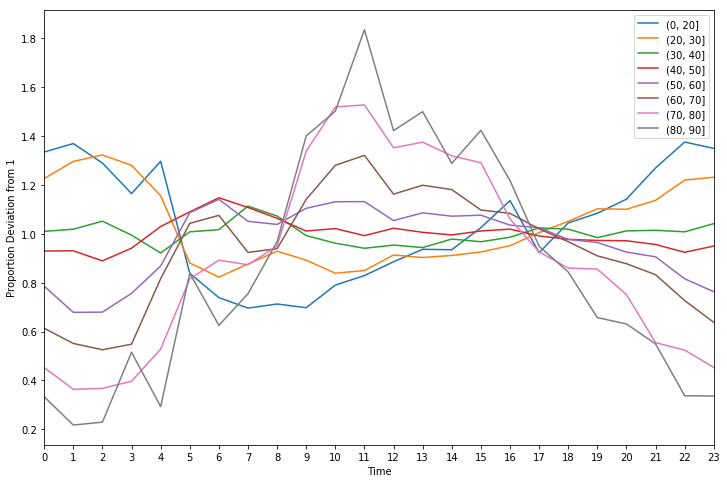

In [207]:
pd.set_option('display.max_columns',25)

ax = age_time1.iloc[:8,:].T.plot(figsize=(12,8))
ax.legend(bbox_to_anchor=(1,1))
xticks(np.arange(24),range(0,24))
ax.set_xlabel("Time")
ax.set_ylabel("Proportion Deviation from 1")

The table above compares the frequency of collisions at a given time for a given age group to the age group's frequency of collisions overall. From the table, we can conclude, for example, that people in their teens and 20's are in proportionally more collisions between 9pm and 4am than they are overall. 

Compare this to people in their 50's: most collisions that involve them occur between 5am and 5pm. They are involved in proportionally fewer collisions between 6pm and 4am.

People in their 70's are in proportionally more of the collisions between 9am and 4pm, and are in proportionally fewer of the collisions between 10pm and 5am. 

When a person's age cannot be determined, police departments may report age as 99, so the 90-100 category is not particularly useful. This is why it is not displayed in the table above.

In [34]:
data['Date Occurred'].replace(regex=True,inplace=True,to_replace=r'T00:00:00.000',value=r'')
data['year'] = pd.DatetimeIndex(data['Date Occurred']).year
data['year'].value_counts()

2017    57721
2018    57120
2016    56527
2015    52485
2014    46950
2012    45399
2011    45276
2010    45086
2013    45033
2019    29971
Name: year, dtype: int64

Text(0,0.5,'Number of Collisions')

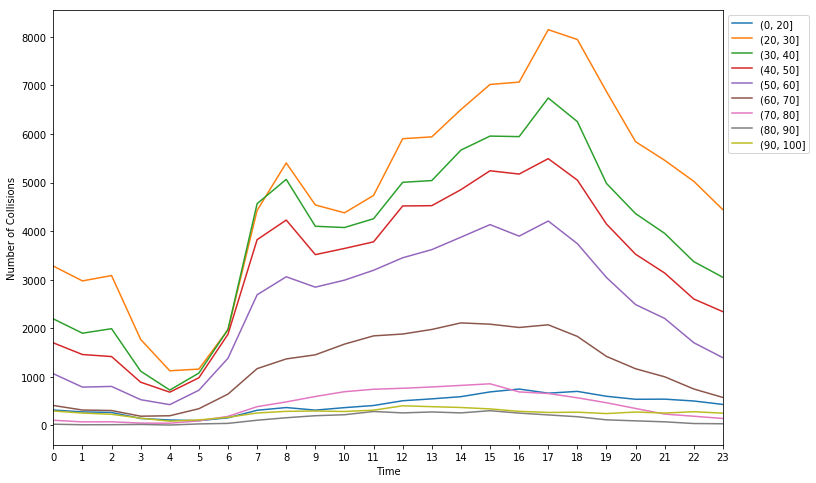

In [205]:
ax = age_time_t.plot(figsize=(12,8))
ax.legend(bbox_to_anchor=(1,1))
xticks(np.arange(24),range(0,24))
ax.set_xlabel("Time")
ax.set_ylabel("Number of Collisions")

In [190]:
data['Victim Sex'].value_counts()

M    280934
F    182429
X     11016
H       132
N        11
Name: Victim Sex, dtype: int64

In [191]:
data['Victim Descent'].value_counts()

H    177340
W    114769
O     71597
B     62837
X     21834
A     18083
K      3869
F      1414
C       700
U       347
J       273
V       185
P       181
I       141
Z       125
G        39
S        31
D        15
L         4
-         2
Name: Victim Descent, dtype: int64

In [206]:
data['Victim Age'].value_counts()

30.0    14048
25.0    13111
24.0    11577
27.0    11494
28.0    11419
26.0    11334
40.0    11292
35.0    11255
23.0    11194
50.0    10767
29.0    10726
22.0    10693
31.0    10099
32.0     9788
21.0     9439
33.0     9267
45.0     9069
34.0     8966
20.0     8723
36.0     8502
37.0     8250
38.0     8142
39.0     7829
41.0     7741
42.0     7647
43.0     7420
44.0     7297
46.0     7261
49.0     7224
47.0     7166
        ...  
78.0      737
80.0      626
79.0      622
81.0      580
83.0      466
82.0      454
84.0      377
85.0      333
86.0      261
87.0      233
19.0      222
89.0      190
88.0      176
90.0      158
17.0      124
91.0       93
92.0       81
94.0       51
95.0       50
93.0       47
96.0       40
16.0       37
98.0       34
97.0       32
15.0       27
14.0       13
13.0        9
12.0        8
10.0        4
11.0        3
Name: Victim Age, Length: 90, dtype: int64